In [1]:
# python 3

"""
# File name: Heart_Disease_Machine_Learning_Prediction_Model.ipynb
# Zhihong (George) Li (zhihongli@bennington.edu)

This file intends to test many kinds of ML models for predicting whether a patient has heart disease.
If the patient has heart disease, the model will retuen 1, if the patient does not have heart disease,
the model will return 0.

The other jupyter file named "Shuffle_Data_Ten_Times_and_Evaluate_Model", 
continues to evaluate a high potential ML model that we tested here for heart disease prediction.

Dataset comes from Kaggle https://www.kaggle.com/nyjoey/heart-disease
"""

# import all the modules for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras

# Data analysis and visualization

In [2]:
# read the file using pandas
df = pd.read_csv('heart.csv')

In [3]:
# let's check the basic info about this dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# let's build a dictionary for us to easily access the definition of each feature in the dataset
features = {'age': 'age',
            'sex':'gender',
            'cp':'chest pain type (4 values)',
           'trestbps':'resting blood pressure',
           'chol':'serum cholestoral in mg/dl',
           'fbs':'fasting blood sugar > 120 mg/dl',
           'restecg':'resting electrocardiographic results (values 0,1,2)',
           'thalach':'maximum heart rate achieved',
           'exang':'exercise induced angina',
           'oldpeak':'ST depression induced by exercise relative to rest',
           'slope':'the slope of the peak exercise ST segment',
           'ca':'number of major vessels (0-3) colored by flourosopy',
           'thal':'thal: 3 = normal; 6 = fixed defect; 7 = reversable defect',
           'target':'presence of heart disease in the patient. It is integer valued from 0 to 1.'}

In [5]:
# test the dictionary
features['cp']

'chest pain type (4 values)'

In [6]:
# check the info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# so basically, all the data seems like it's been preprocessed 
# because the data type are all numbers. Now let's further explore the data.
# There are about 303 entries of data.

In [8]:
# check out the dataFrame using describe() function
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
# let's confirm if there is any na data or not
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
# let's confirm that how many values are there in the target column.
df['target'].unique()

array([1, 0], dtype=int64)

In [11]:
# 1 means that there is heart disease
# 0 means that there is no heart disease

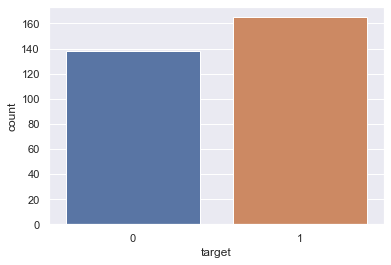

In [12]:
# Now let's get a countplot to check whether the dataset is balanced or not
# in terms of the ratio of patient who has heart disease and who does not

sns.set(style='darkgrid')
sns.countplot(x='target',data=df)

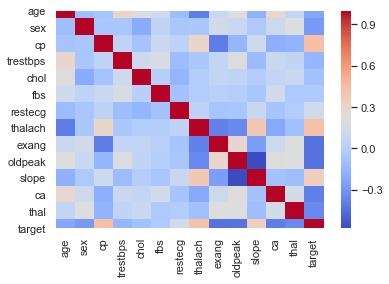

In [13]:
# heatmap
sns.heatmap(data=df.corr(),cmap='coolwarm')

In [14]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [15]:
# let's check the correlation between each features and heart disease
df.corr()['target'].sort_values()[:-1]

exang      -0.436757
oldpeak    -0.430696
ca         -0.391724
thal       -0.344029
sex        -0.280937
age        -0.225439
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
slope       0.345877
thalach     0.421741
cp          0.433798
Name: target, dtype: float64

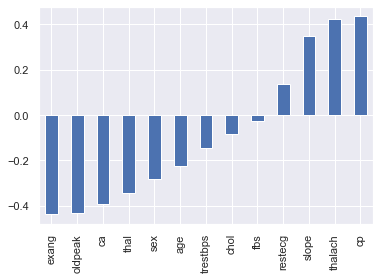

In [16]:
# it seems that cp, thalach, slope and restecg has the most significant influence for heart disease detection.
# let's make a barplot in terms of the relations between target and other features
df.corr()['target'][:-1].sort_values().plot(kind='bar')

# We see that people who have heart disease intend to have less trestbps, high thalach, and low oldpeak. Let's further explore the details

Description of cp: chest pain type (4 values)


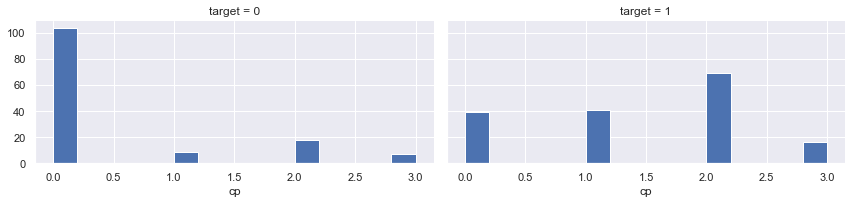

In [17]:
# let's see the distributions of cp.
print('Description of cp:', features['cp'])
g = sns.FacetGrid(df, col="target",aspect = 2)
g = g.map(plt.hist, "cp", bins=15)

In [18]:
# if people have type 1, 2, or 3 for chest pain, they are more likely to have heart disease.

# Let's see the distributions of thalach.

Description of thalach: maximum heart rate achieved


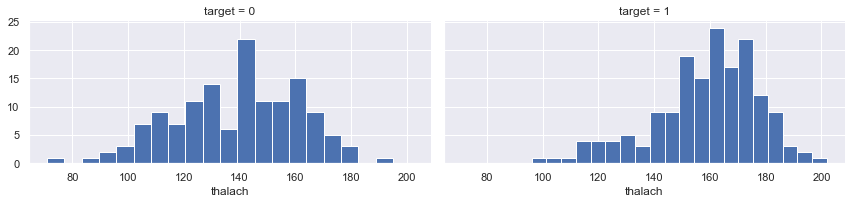

In [19]:
print('Description of thalach:', features['thalach'])
g = sns.FacetGrid(df, col="target",aspect = 2)
g = g.map(plt.hist, "thalach", bins=20)

In [20]:
# There is a difference between the centers of these two distribution graph.
# people who do not have heart disease generally have lower maximum heart rate
# achieved than people who do have heart disease. according to the graph above.

# Let's see the distributions of slope.

Description of slope: the slope of the peak exercise ST segment


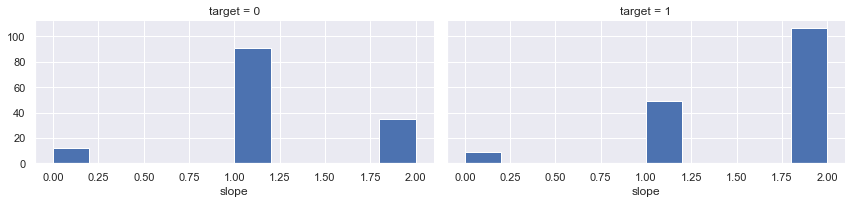

In [21]:
# let's see the distributions of trestbps.
print('Description of slope:', features['slope'])
g = sns.FacetGrid(df, col="target",aspect = 2)
g = g.map(plt.hist, "slope")

In [22]:
# people who have slopes between 1.75 to 2 are more likely to have heart disease than people who have lower slopes

# Let's see the distributions of restecg.

Description of restecg: resting electrocardiographic results (values 0,1,2)


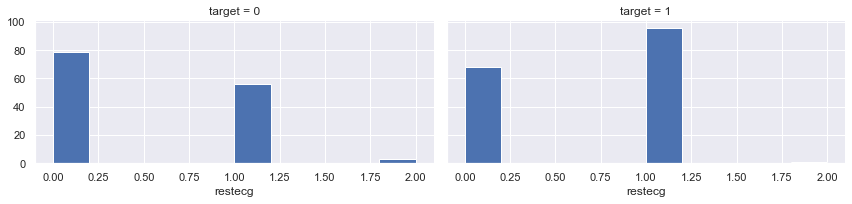

In [23]:
print('Description of restecg:', features['restecg'])
g = sns.FacetGrid(df, col="target",aspect = 2)
g = g.map(plt.hist, "restecg")

In [24]:
# in this case, there's not obvious difference for feature 'restecg' between people who have heart disease and people
# who do not

# Now, it's time to split our dataset into test, and train and then train out model.

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
# let's define X and y
X = df.drop('target',axis=1)
y = df['target']

In [27]:
# now, we split out dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [28]:
# now we select a classification model to train.
# we decide to use linear regression model.

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
logmodel = LogisticRegression()

In [31]:
logmodel.fit(X_train,y_train)

d:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
logmodel_pred = logmodel.predict(X_test)

In [33]:
logmodel.coef_

### Now let's move on to evaluation

In [35]:
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
print(classification_report(y_test, logmodel_pred))
print(confusion_matrix(y_test, logmodel_pred))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81        39
           1       0.86      0.85      0.85        52

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.84      0.84      0.84        91

[[32  7]
 [ 8 44]]


In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
dtree = DecisionTreeClassifier()

In [39]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [40]:
pred_dtree = dtree.predict(X_test)

In [41]:
print(classification_report(y_test, pred_dtree))
print(confusion_matrix(y_test, pred_dtree))

              precision    recall  f1-score   support

           0       0.74      0.79      0.77        39
           1       0.84      0.79      0.81        52

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91

[[31  8]
 [11 41]]


In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
rfc = RandomForestClassifier(n_estimators=150)

In [44]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [45]:
pred_rfc = rfc.predict(X_test)

In [46]:
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.73      0.85      0.79        39
           1       0.87      0.77      0.82        52

    accuracy                           0.80        91
   macro avg       0.80      0.81      0.80        91
weighted avg       0.81      0.80      0.80        91

[[33  6]
 [12 40]]


In [47]:
from sklearn.svm import SVC

In [48]:
model_svc = SVC()

In [49]:
model_svc.fit(X_train, y_train)

d:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [50]:
pred_svc = model_svc.predict(X_test)

In [51]:
print(classification_report(y_test, pred_svc))
print(confusion_matrix(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        39
           1       0.57      0.98      0.72        52

    accuracy                           0.56        91
   macro avg       0.28      0.49      0.36        91
weighted avg       0.32      0.56      0.41        91

[[ 0 39]
 [ 1 51]]


In [52]:
# It seems that svc model guess everything negative. there's something wrong with it.

# Now it's time to try Deep Learning Neural Networks model to see whether it improves the prediction result or not.

In [53]:
# compare all the model that I have trained so far.
# logisticRegression is the best. 
# next, we will try neuro network trainning to see if that's gonna improve the result at all.

In [54]:
# let's import modules first
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [55]:
# let's create our model object
# because there are 13 features our first layer will be 13
model = Sequential()

model.add(Dense(units=13,activation='relu'))
# model.add(Dropout(0.4))
model.add(Dense(units=6,activation='relu'))
# model.add(Dropout(0.4))
model.add(Dense(units=3,activation='relu'))
# model.add(Dropout(0.4))

# last layer
model.add(Dense(units=1,activation='sigmoid'))

# for a binary classification problem
model.compile(optimizer='adam',loss='binary_crossentropy')

In [56]:
# before we train our model with the data, we need to preprocess our data
# we need to scale our data

# scaling the data

In [57]:
# let's check what's the X data right now for later use.
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [58]:
# since X and y are still dataFrame, let's make them into only vectors of values 
# in order for us to train the data later.
X = df.drop('target',axis=1).values
X

array([[63.,  1.,  3., ...,  0.,  0.,  1.],
       [37.,  1.,  2., ...,  0.,  0.,  2.],
       [41.,  0.,  1., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  1., ...,  1.,  1.,  2.]])

In [59]:
y = df['target'].values
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# let's split out data again after preprocessing

In [60]:
from sklearn.preprocessing import MinMaxScaler

In [61]:
# create an object of scaler
scaler = MinMaxScaler()

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [63]:
# use the scaler to fit the X_train data to find the unify the scale of the data for each feature.
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [64]:
# now let's transform our X_train, and X_test data to a unified unit.
print("Before Transformation: \n", X_train, "\n")
X_train = scaler.transform(X_train)
print("After Transformation: \n", X_train, "\n")

Before Transformation: 
 [[66.  1.  0. ...  2.  1.  2.]
 [62.  1.  2. ...  1.  3.  3.]
 [45.  0.  0. ...  1.  0.  2.]
 ...
 [59.  1.  0. ...  2.  1.  3.]
 [35.  1.  1. ...  2.  0.  2.]
 [48.  1.  0. ...  1.  0.  3.]] 

After Transformation: 
 [[0.77083333 1.         0.         ... 1.         0.25       0.66666667]
 [0.6875     1.         0.66666667 ... 0.5        0.75       1.        ]
 [0.33333333 0.         0.         ... 0.5        0.         0.66666667]
 ...
 [0.625      1.         0.         ... 1.         0.25       1.        ]
 [0.125      1.         0.33333333 ... 1.         0.         0.66666667]
 [0.39583333 1.         0.         ... 0.5        0.         1.        ]] 



In [65]:
# now let's transform our X_train, and X_test data to a unified unit.
print("Before Transformation: \n", X_test, "\n")
X_test = scaler.transform(X_test)
print("After Transformation: \n", X_test, "\n")

Before Transformation: 
 [[56.  0.  0. ...  0.  2.  3.]
 [50.  1.  2. ...  2.  0.  2.]
 [54.  0.  2. ...  2.  1.  2.]
 ...
 [59.  1.  0. ...  0.  0.  3.]
 [63.  0.  2. ...  2.  0.  2.]
 [44.  1.  2. ...  2.  0.  2.]] 

After Transformation: 
 [[0.5625     0.         0.         ... 0.         0.5        1.        ]
 [0.4375     1.         0.66666667 ... 1.         0.         0.66666667]
 [0.52083333 0.         0.66666667 ... 1.         0.25       0.66666667]
 ...
 [0.625      1.         0.         ... 0.         0.         1.        ]
 [0.70833333 0.         0.66666667 ... 1.         0.         0.66666667]
 [0.3125     1.         0.66666667 ... 1.         0.         0.66666667]] 



# Now, let's fit our data into the model and test

# Model 1

In [67]:
model.fit(x=X_train,
          y=y_train,
          epochs=300,
         validation_data=(X_test,y_test),verbose=1)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 212 samples, validate on 91 samples
Epoch 1/300
212/212 [==============================] - 1s 5ms/sample - loss: 0.6961 - val_loss: 0.6898
Epoch 2/300
212/212 [==============================] - 0s 114us/sample - loss: 0.6947 - val_loss: 0.6892
Epoch 3/300
212/212 [==============================] - 0s 222us/sample - loss: 0.6935 - val_loss: 0.6887
Epoch 4/300
212/212 [==============================] - 0s 128us/sample - loss: 0.6921 - val_loss: 0.6875
Epoch 5/300
212/212 [==============================] - 0s 180us/sample - loss: 0.6905 - val_loss: 0.6861
Epoch 6/300
212/212 [==============================] - 0s 194us/sample - loss: 0.6888 - val_loss: 0.6844
Epoch 7/300
212/212 [==============================] - 0s 218us/sample - loss: 0.6863 - val_loss: 0.6817
Epoch 8/300
212/212 [==========================

212/212 [==============================] - 0s 118us/sample - loss: 0.2993 - val_loss: 0.3851
Epoch 149/300
212/212 [==============================] - 0s 142us/sample - loss: 0.2980 - val_loss: 0.3850
Epoch 150/300
212/212 [==============================] - 0s 160us/sample - loss: 0.2981 - val_loss: 0.3862
Epoch 151/300
212/212 [==============================] - 0s 109us/sample - loss: 0.2970 - val_loss: 0.3860
Epoch 152/300
212/212 [==============================] - 0s 132us/sample - loss: 0.2974 - val_loss: 0.3848
Epoch 153/300
212/212 [==============================] - 0s 114us/sample - loss: 0.2964 - val_loss: 0.3851
Epoch 154/300
212/212 [==============================] - 0s 151us/sample - loss: 0.2955 - val_loss: 0.3856
Epoch 155/300
212/212 [==============================] - 0s 114us/sample - loss: 0.2943 - val_loss: 0.3835
Epoch 156/300
212/212 [==============================] - 0s 118us/sample - loss: 0.2950 - val_loss: 0.3819
Epoch 157/300
212/212 [============================

212/212 [==============================] - 0s 194us/sample - loss: 0.1898 - val_loss: 0.5155


In [68]:
model.history.history

{'loss': [0.6960584330108931,
  0.6946735786941817,
  0.6934543173268156,
  0.692134216146649,
  0.6905331769079532,
  0.6888313743303407,
  0.6862883624040855,
  0.683070865442168,
  0.6793751244275075,
  0.6744267749336531,
  0.6691324328476528,
  0.663416602701511,
  0.6573748296161868,
  0.650285152894146,
  0.6420303763083692,
  0.6337993842250896,
  0.6241048664416907,
  0.6137777544417471,
  0.602479488219855,
  0.5908166383797268,
  0.5783263546115948,
  0.5653970095346559,
  0.5522417954678805,
  0.5401489622188065,
  0.5269820195324016,
  0.5147550567141119,
  0.5029458561033573,
  0.49136645951361024,
  0.481181283042116,
  0.4704334353500942,
  0.46174181126198677,
  0.45206864937296454,
  0.4441734715452734,
  0.43653846349356307,
  0.42924503672797726,
  0.4221949003777414,
  0.4166234855381948,
  0.41200230818874434,
  0.40685764461193447,
  0.40352911206911196,
  0.40110413533336714,
  0.3969351503084291,
  0.3932159756714443,
  0.3908639055378032,
  0.3873503658006776,

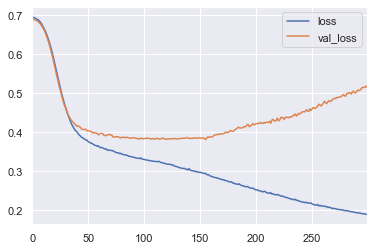

In [69]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [70]:
# basically, we trained too much. so let's try early stopping to track the val_loss 
# and stop training once it begins increasing too much!

In [71]:
# let's create our model object
# because there are 13 features our first layer will be 13
model2 = Sequential()

model2.add(Dense(units=13,activation='relu'))
# model.add(Dropout(0.4))
model2.add(Dense(units=6,activation='relu'))
# model.add(Dropout(0.4))
model2.add(Dense(units=3,activation='relu'))
# model.add(Dropout(0.4))

# last layer
model2.add(Dense(units=1,activation='sigmoid'))

# for a binary classification problem
model2.compile(optimizer='adam',loss='binary_crossentropy')

In [72]:
from tensorflow.keras.callbacks import EarlyStopping

In [73]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [74]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)
model2.fit(x=X_train,
          y=y_train,
          epochs=300,
         validation_data=(X_test,y_test),
          verbose=1,
         callbacks=[early_stop])

Train on 212 samples, validate on 91 samples
Epoch 1/300
212/212 [==============================] - 1s 5ms/sample - loss: 0.7792 - val_loss: 0.8368
Epoch 2/300
212/212 [==============================] - 0s 166us/sample - loss: 0.7328 - val_loss: 0.7855
Epoch 3/300
212/212 [==============================] - 0s 161us/sample - loss: 0.7006 - val_loss: 0.7475
Epoch 4/300
212/212 [==============================] - 0s 227us/sample - loss: 0.6752 - val_loss: 0.7186
Epoch 5/300
212/212 [==============================] - 0s 246us/sample - loss: 0.6540 - val_loss: 0.6983
Epoch 6/300
212/212 [==============================] - 0s 322us/sample - loss: 0.6386 - val_loss: 0.6828
Epoch 7/300
212/212 [==============================] - 0s 194us/sample - loss: 0.6259 - val_loss: 0.6716
Epoch 8/300
212/212 [==============================] - 0s 175us/sample - loss: 0.6164 - val_loss: 0.6628
Epoch 9/300
212/212 [==============================] - 0s 182us/sample - loss: 0.6088 - val_loss: 0.6552
Epoch 10/300

Epoch 78/300
212/212 [==============================] - 0s 139us/sample - loss: 0.4434 - val_loss: 0.5261
Epoch 79/300
212/212 [==============================] - 0s 194us/sample - loss: 0.4425 - val_loss: 0.5250
Epoch 80/300
212/212 [==============================] - 0s 260us/sample - loss: 0.4406 - val_loss: 0.5251
Epoch 81/300
212/212 [==============================] - 0s 322us/sample - loss: 0.4395 - val_loss: 0.5251
Epoch 82/300
212/212 [==============================] - 0s 227us/sample - loss: 0.4380 - val_loss: 0.5257
Epoch 83/300
212/212 [==============================] - 0s 137us/sample - loss: 0.4369 - val_loss: 0.5263
Epoch 84/300
212/212 [==============================] - 0s 113us/sample - loss: 0.4359 - val_loss: 0.5262
Epoch 85/300
212/212 [==============================] - 0s 132us/sample - loss: 0.4347 - val_loss: 0.5252
Epoch 86/300
212/212 [==============================] - 0s 109us/sample - loss: 0.4342 - val_loss: 0.5243
Epoch 87/300
212/212 [========================

In [75]:
model2.history.history

{'loss': [0.7791650868811697,
  0.7328029229955854,
  0.7006174539620021,
  0.6751862876820114,
  0.6539611850144729,
  0.638622448129474,
  0.6258923973677293,
  0.6163856285922932,
  0.6088303901114553,
  0.6027923451279694,
  0.5977948679114288,
  0.5928757179458186,
  0.588489442501428,
  0.5842375642848465,
  0.5799257446010158,
  0.5762445364358291,
  0.5723752907986911,
  0.5691926164447136,
  0.565398170700613,
  0.5620183506101932,
  0.5586665655082127,
  0.5556780279807325,
  0.5523402364748828,
  0.5495198414010821,
  0.5464994271971145,
  0.5435882103892992,
  0.54083037601327,
  0.5379511567781556,
  0.53539732211041,
  0.5325987024127312,
  0.5298662163176626,
  0.5271052864362609,
  0.5245165375043761,
  0.5222818187947543,
  0.5194360827499965,
  0.5170143550297,
  0.5143648813355644,
  0.5120625490287565,
  0.5096252122015323,
  0.5072027703501144,
  0.5049333825426282,
  0.5028110911261361,
  0.5005895731584081,
  0.4983296118817239,
  0.49631372487769937,
  0.4943882

In [76]:
model2_loss = pd.DataFrame(model2.history.history)

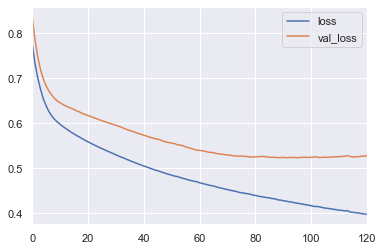

In [77]:
model2_loss.plot()

In [78]:
# this model is a little bit better but it's not enough.
# in this model, let's try to use only three neuro networks 

In [79]:
# let's create our model object
# because there are 13 features our first layer will be 13
model3 = Sequential()

model3.add(Dense(units=13,activation='relu'))
model3.add(Dense(units=6,activation='relu'))

# last layer
model3.add(Dense(units=1,activation='sigmoid'))

# for a binary classification problem
model3.compile(optimizer='adam',loss='binary_crossentropy')

early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)
model3.fit(x=X_train,
          y=y_train,
          epochs=600,
         validation_data=(X_test,y_test),
          verbose=1,
         callbacks=[early_stop])

Train on 212 samples, validate on 91 samples
Epoch 1/600
212/212 [==============================] - 1s 4ms/sample - loss: 0.6782 - val_loss: 0.6596
Epoch 2/600
212/212 [==============================] - 0s 95us/sample - loss: 0.6704 - val_loss: 0.6495
Epoch 3/600
212/212 [==============================] - 0s 258us/sample - loss: 0.6630 - val_loss: 0.6397
Epoch 4/600
212/212 [==============================] - 0s 166us/sample - loss: 0.6555 - val_loss: 0.6305
Epoch 5/600
212/212 [==============================] - 0s 232us/sample - loss: 0.6486 - val_loss: 0.6206
Epoch 6/600
212/212 [==============================] - 0s 156us/sample - loss: 0.6407 - val_loss: 0.6116
Epoch 7/600
212/212 [==============================] - 0s 166us/sample - loss: 0.6328 - val_loss: 0.6023
Epoch 8/600
212/212 [==============================] - 0s 374us/sample - loss: 0.6247 - val_loss: 0.5930
Epoch 9/600
212/212 [==============================] - 0s 180us/sample - loss: 0.6162 - val_loss: 0.5836
Epoch 10/600


In [80]:
model3.history.history

{'loss': [0.6781701119440906,
  0.6704408425205158,
  0.663026712975412,
  0.6555239389527519,
  0.6486469012386394,
  0.6406868021443205,
  0.6327632778095749,
  0.6247414080601819,
  0.6162363414494496,
  0.6066192208595995,
  0.5976950470006691,
  0.588052326778196,
  0.5776852684200935,
  0.5682831901424336,
  0.5582338931425562,
  0.5490948209222758,
  0.5398967839636892,
  0.5305321261567889,
  0.5214521210148649,
  0.5130051947989553,
  0.5046356534058193,
  0.4970124436999267,
  0.48942107412050356,
  0.4822781580799031,
  0.47462998583631694,
  0.46852870482318804,
  0.46231534852171846,
  0.4561346167663358,
  0.45105085732801903,
  0.44648529223676,
  0.44082971676340643,
  0.43673983947286066,
  0.43266858244841955,
  0.4288262702384085,
  0.4254341429134585,
  0.4222717757494944,
  0.419117383237155,
  0.4156628172352629,
  0.4134796655402993,
  0.41092907820107805,
  0.40828618294787855,
  0.4062607963130159,
  0.4045630578162535,
  0.40345693084428896,
  0.40068293123875

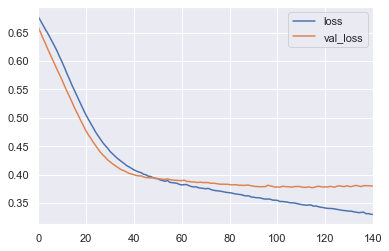

In [81]:
model3_loss = pd.DataFrame(model3.history.history)
model3_loss.plot()

In [82]:
# let's try to use dropout layer to see if that improves the result

In [83]:
from tensorflow.keras.layers import Dropout

In [84]:
# let's create our model object
# because there are 13 features our first layer will be 13
model4 = Sequential()

model4.add(Dense(units=13,activation='relu'))
model.add(Dropout(0.5))

model4.add(Dense(units=6,activation='relu'))
model.add(Dropout(0.5))

# last layer
model4.add(Dense(units=1,activation='sigmoid'))

# for a binary classification problem
model4.compile(optimizer='adam',loss='binary_crossentropy')

In [85]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)
model4.fit(x=X_train,
          y=y_train,
          epochs=600,
         validation_data=(X_test,y_test),
          verbose=1,
         callbacks=[early_stop])

Train on 212 samples, validate on 91 samples
Epoch 1/600
212/212 [==============================] - 1s 3ms/sample - loss: 0.7373 - val_loss: 0.7669
Epoch 2/600
212/212 [==============================] - 0s 123us/sample - loss: 0.7230 - val_loss: 0.7519
Epoch 3/600
212/212 [==============================] - 0s 137us/sample - loss: 0.7114 - val_loss: 0.7408
Epoch 4/600
212/212 [==============================] - 0s 189us/sample - loss: 0.7008 - val_loss: 0.7337
Epoch 5/600
212/212 [==============================] - 0s 194us/sample - loss: 0.6919 - val_loss: 0.7261
Epoch 6/600
212/212 [==============================] - 0s 166us/sample - loss: 0.6829 - val_loss: 0.7198
Epoch 7/600
212/212 [==============================] - 0s 293us/sample - loss: 0.6742 - val_loss: 0.7129
Epoch 8/600
212/212 [==============================] - 0s 164us/sample - loss: 0.6656 - val_loss: 0.7040
Epoch 9/600
212/212 [==============================] - 0s 128us/sample - loss: 0.6565 - val_loss: 0.6972
Epoch 10/600

Epoch 78/600
212/212 [==============================] - 0s 132us/sample - loss: 0.4350 - val_loss: 0.5205
Epoch 79/600
212/212 [==============================] - 0s 137us/sample - loss: 0.4322 - val_loss: 0.5199
Epoch 80/600
212/212 [==============================] - 0s 175us/sample - loss: 0.4308 - val_loss: 0.5190
Epoch 81/600
212/212 [==============================] - 0s 151us/sample - loss: 0.4297 - val_loss: 0.5182
Epoch 82/600
212/212 [==============================] - 0s 147us/sample - loss: 0.4285 - val_loss: 0.5169
Epoch 83/600
212/212 [==============================] - 0s 114us/sample - loss: 0.4276 - val_loss: 0.5165
Epoch 84/600
212/212 [==============================] - 0s 142us/sample - loss: 0.4261 - val_loss: 0.5159
Epoch 85/600
212/212 [==============================] - 0s 142us/sample - loss: 0.4256 - val_loss: 0.5162
Epoch 86/600
212/212 [==============================] - 0s 142us/sample - loss: 0.4237 - val_loss: 0.5145
Epoch 87/600
212/212 [========================

Epoch 155/600
212/212 [==============================] - 0s 161us/sample - loss: 0.3574 - val_loss: 0.4880
Epoch 156/600
212/212 [==============================] - 0s 132us/sample - loss: 0.3556 - val_loss: 0.4854
Epoch 157/600
212/212 [==============================] - 0s 132us/sample - loss: 0.3541 - val_loss: 0.4856
Epoch 158/600
212/212 [==============================] - 0s 151us/sample - loss: 0.3531 - val_loss: 0.4865
Epoch 159/600
212/212 [==============================] - 0s 132us/sample - loss: 0.3523 - val_loss: 0.4862
Epoch 160/600
212/212 [==============================] - 0s 132us/sample - loss: 0.3513 - val_loss: 0.4850
Epoch 161/600
212/212 [==============================] - 0s 151us/sample - loss: 0.3516 - val_loss: 0.4857
Epoch 162/600
212/212 [==============================] - 0s 147us/sample - loss: 0.3499 - val_loss: 0.4856
Epoch 163/600
212/212 [==============================] - 0s 137us/sample - loss: 0.3489 - val_loss: 0.4857
Epoch 164/600
212/212 [==============

In [86]:
model4.history.history

{'loss': [0.7373138396245129,
  0.7230333944536605,
  0.7113728118392656,
  0.7007810765842222,
  0.691873255765663,
  0.6829082133635035,
  0.6742389595733499,
  0.6655737847652076,
  0.6565005441881576,
  0.6469032989358002,
  0.6367411849633703,
  0.6273886831301563,
  0.6172671194346446,
  0.6070610577205442,
  0.5988135011690967,
  0.5897729329343112,
  0.5830434549529597,
  0.5763954677671757,
  0.569926916428332,
  0.5635855703983667,
  0.5585165080034508,
  0.5530408767034423,
  0.5480288143427867,
  0.5436510106302658,
  0.5394245003754238,
  0.5352954257209346,
  0.5318502536359823,
  0.5281752955238774,
  0.524697760366044,
  0.521492857978029,
  0.518364077469088,
  0.5154158371799397,
  0.5126397947095475,
  0.5096697717342736,
  0.5067317626386318,
  0.5040653021830432,
  0.501395158047946,
  0.4989999195314803,
  0.4965363808397977,
  0.4943531352394032,
  0.492100013876861,
  0.4899848069784776,
  0.4883762912930183,
  0.48521036415729885,
  0.4834644142186867,
  0.4817

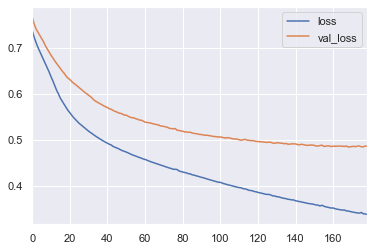

In [87]:
model4_loss = pd.DataFrame(model4.history.history)
model4_loss.plot()

In [88]:
# After trying some neural network classification, let's do the evaluation
# we select the model that did the best and predict. 
# both model 3 and model 4 seem good. Let's just pick model 4
model4_pred = model4.predict_classes(X_test)

In [89]:
print(classification_report(y_test,model4_pred))

              precision    recall  f1-score   support

           0       0.87      0.70      0.78        37
           1       0.82      0.93      0.87        54

    accuracy                           0.84        91
   macro avg       0.84      0.81      0.82        91
weighted avg       0.84      0.84      0.83        91



In [90]:
print(confusion_matrix(y_test,model4_pred))

[[26 11]
 [ 4 50]]


In [92]:
# It seems that it has similar result as LogisticRegression Model that we had earlier. 
# This model is relatively a bit worse than that one. However, we could not tell if this statement is
# true or not when we have some more data.

# In conclusion, Linear model - Logistic Regression model has similar than neural networks model.
# but this situation might change as we have more data. For now, we can use both model to predict whether the patient has heart disease or not. We want to minimize the number of patient who has disease but does not get treated. 

# It will be better to also have doctors' assistance to better build the model
